In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_3 = pd.read_csv("/content/drive/MyDrive/E-Commerce Churn Data.csv")

In [7]:
df_3.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [8]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Data Cleaning

The dataset was split into two sections for data cleaning: one with all numerical features and the other with all other non-numeric features. Prior to the data cleaning, we looked to see if the dataset contained any missing values. Seven features have values that are missing. Since the values are only whole numbers in all the numeric features, all the missing values are then filled with 0. The data will be manipulated if we take the median because there is a chance we will get decimal numbers. Next we verified that there are no negative values in the dataset.

We discovered that data cleaning is necessary for those variables as well by examining the unique values of each non-numeric feature. "Mobile Phone", "Phone", and "Computer" are the 3 distinct values in the "PreferredLoginDevice" feature. According to the research, "Phone" are not used as login devices as frequently as "computer" and "mobile phone". So, we change all references with "Mobile Phone" to "Phone". We did the same process to the "PreferedOrderCat" feature also. We observed that the "PreferredPaymentMode" has 7 different values. They are "Credit Card," "Debit Card," "UPI," "CC," "Cash on Delivery," "E wallet," and "COD." According to our research, "CC" and "COD" are similar ways to display credit card payments and cash on delivery, respectively. So, in the "PreferredPaymentMode" feature, we change all "CC" values to "Credit Card" and all "COD" values to "Cash on Delivery."

In [9]:
# Isolate all numeric features
df_3_num = df_3.select_dtypes(exclude=['object'])
df_3_num.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,130


In [10]:
# Isolate all non-numeric features
df_3_cat = df_3.select_dtypes(include=['object'])
df_3_cat.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [11]:
# Checking for missing values in the dataset
print(df_3_num.isnull().any())

CustomerID                     False
Churn                          False
Tenure                          True
CityTier                       False
WarehouseToHome                 True
HourSpendOnApp                  True
NumberOfDeviceRegistered       False
SatisfactionScore              False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                 False
dtype: bool


In [12]:
# Fill in any missing values with 0
df_3_num = df_3_num.fillna(0)

In [13]:
has_negative_values = (df_3_num < 0).any().any()

if has_negative_values:
    print("There are negative values in the DataFrame.")
else:
    print("There are no negative values in the DataFrame.")

There are no negative values in the DataFrame.


In [14]:
df_3_cat['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [15]:
df_3_cat['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [16]:
df_3_cat['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df_3_cat['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [18]:
df_3_cat['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [19]:
# Replace Values
df_3_cat['PreferredLoginDevice'] = df_3_cat['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')
df_3_cat['PreferedOrderCat'] = df_3_cat['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')
df_3_cat['PreferredPaymentMode'] = df_3_cat['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
df_3_cat['PreferredPaymentMode'] = df_3_cat['PreferredPaymentMode'].replace('CC', 'Credit Card')

## Visualizing Data

We first made plots for each of the non-numeric features to help us understand how the data was distributed among all the non-numeric features.

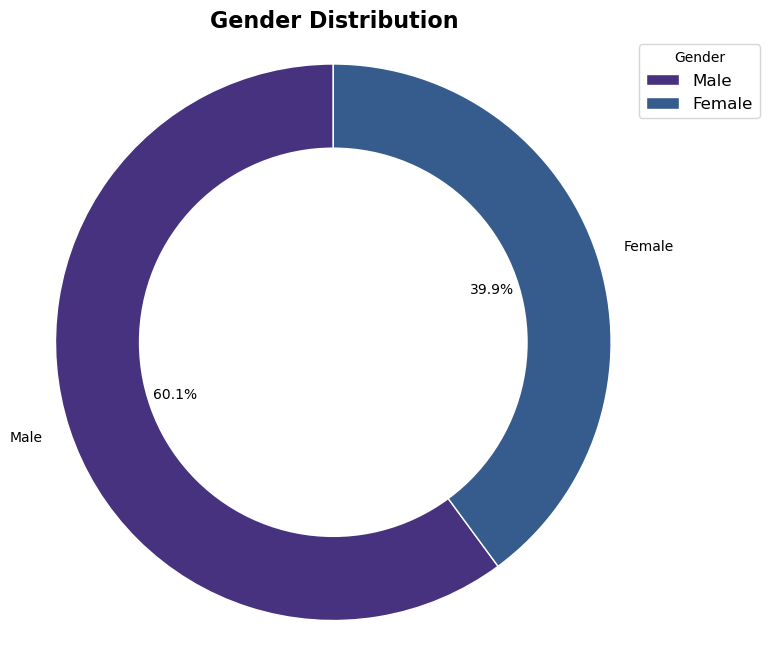

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'Gender'

gender_counts = df_3_cat[feature].value_counts()

sns.set_palette("viridis")

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.legend(labels=gender_counts.index, title='Gender', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))
plt.show()

According to this graph, It shows the gender distribution among all the customers. The majority of customers are male, accounting for 60.1%. The dataset contains 39.9% femele customers.

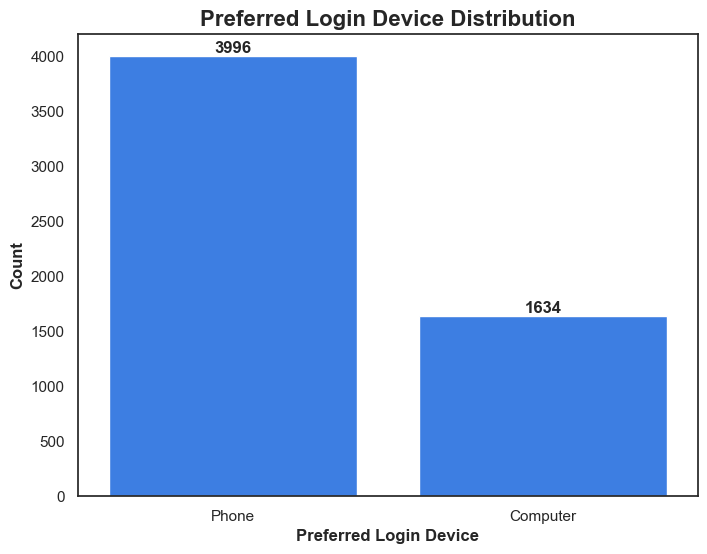

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'PreferredLoginDevice'

device_counts = df_3_cat[feature].value_counts()

sns.set(style="white")

plt.figure(figsize=(8, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, color="#2178FE")

plt.title('Preferred Login Device Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Preferred Login Device', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

for i, count in enumerate(device_counts.values):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

This graph depicts the preferred login device distribution among all customers. According to data, the majority of customers use their phone as their login device rather than a computer.

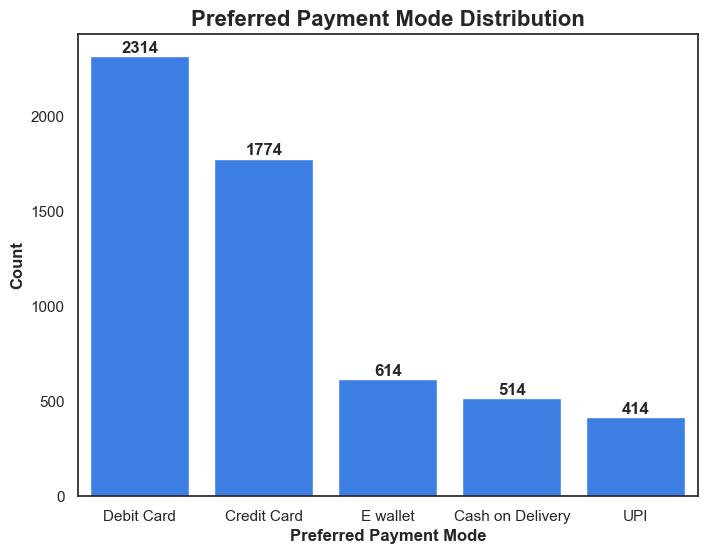

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'PreferredPaymentMode'

device_counts = df_3_cat[feature].value_counts()

sns.set(style="white")

plt.figure(figsize=(8, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, color="#2178FE")

plt.title('Preferred Payment Mode Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Preferred Payment Mode', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

for i, count in enumerate(device_counts.values):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

This graph depicts the preferred payment mode distribution among the dataset's customers. It is clear that the majority of customers prefer to pay with a debit card, while UPI is the least preferred payment method. After using debit cards, customers prefer credit cards as a payment method, which is more than the E wallet method and the Cash on Delivery method. There is only a difference of 100 customers between each payment mode, from E wallet to UPI.

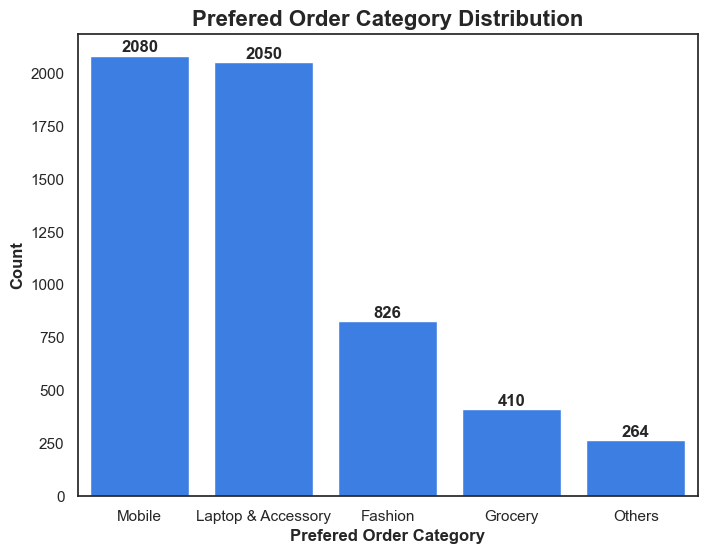

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'PreferedOrderCat'

device_counts = df_3_cat[feature].value_counts()

sns.set(style="white")

plt.figure(figsize=(8, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, color="#2178FE")

plt.title('Prefered Order Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Prefered Order Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

for i, count in enumerate(device_counts.values):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

This graph depicts the customers' preferred order category. According to the chart, the majority of customers order from the Mobile category, while the least number of customers order from other categories. The laptop and accessory category ranks lower than the mobile category. The fashion category is preferred over the grocery category.

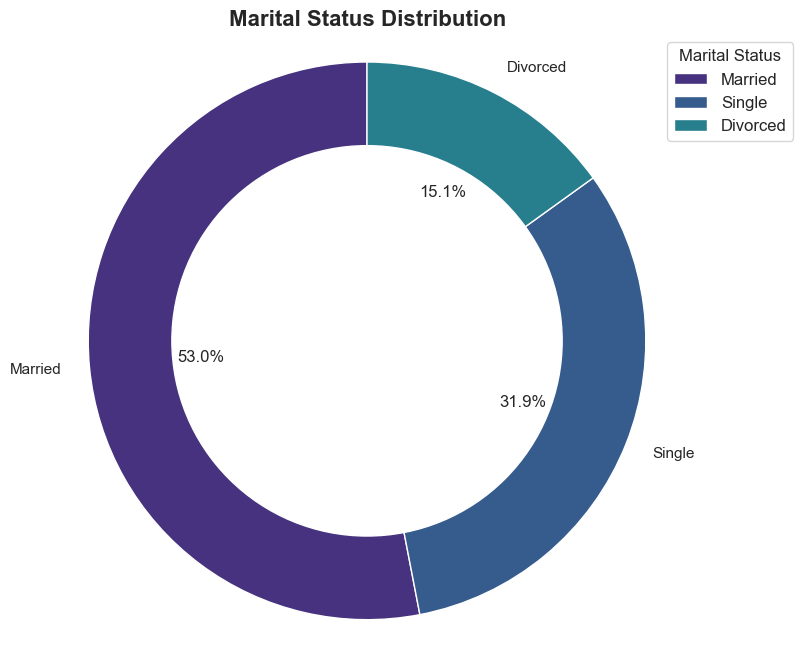

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'MaritalStatus'

gender_counts = df_3_cat[feature].value_counts()

sns.set_palette("viridis")

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Marital Status Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.legend(labels=gender_counts.index, title='Marital Status', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))
plt.show()

According to this chart, all customers are divided into three major groups based on their marital status. The majority of customers are married, with 31.9% being single. Divorced customers account for 15.1% of all customers, making them the smallest category.

## Churned customers' Analysis

We combined the cleaned numeric features and non-numeric features dataframes into a single dataframe in this section. The dataset was then divided into two parts. They are the churned customer data and the customer data that has not churned with the churn feature.

In [25]:
df_3_final = pd.concat([df_3_num, df_3_cat], axis = 1)
df_3_final.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160,Phone,Debit Card,Female,Laptop & Accessory,Single
1,50002,1,0.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,Phone,UPI,Male,Mobile,Single
2,50003,1,0.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120,Phone,Debit Card,Male,Mobile,Single
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134,Phone,Debit Card,Male,Laptop & Accessory,Single
4,50005,1,0.0,1,12.0,0.0,3,5,3,0,11.0,1.0,1.0,3.0,130,Phone,Credit Card,Male,Mobile,Single


In [26]:
#Churn dataset
df_3_final_yes = df_3_final[df_3_final['Churn'] == 1]

#Non-Churn dataset
df_3_final_no = df_3_final[df_3_final['Churn'] == 0]

In [27]:
df_3_final_yes.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160,Phone,Debit Card,Female,Laptop & Accessory,Single
1,50002,1,0.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,Phone,UPI,Male,Mobile,Single
2,50003,1,0.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120,Phone,Debit Card,Male,Mobile,Single
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134,Phone,Debit Card,Male,Laptop & Accessory,Single
4,50005,1,0.0,1,12.0,0.0,3,5,3,0,11.0,1.0,1.0,3.0,130,Phone,Credit Card,Male,Mobile,Single


In [28]:
df_3_final_no.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
26,50027,0,8.0,3,6.0,3.0,3,4,2,0,13.0,1.0,1.0,6.0,173,Phone,E wallet,Male,Fashion,Divorced
27,50028,0,0.0,3,12.0,2.0,3,3,3,1,20.0,0.0,4.0,5.0,123,Phone,E wallet,Male,Laptop & Accessory,Divorced
28,50029,0,18.0,1,0.0,2.0,3,4,9,0,18.0,1.0,1.0,15.0,123,Phone,Debit Card,Male,Laptop & Accessory,Married
29,50030,0,5.0,3,14.0,2.0,3,2,2,0,14.0,2.0,3.0,7.0,190,Computer,E wallet,Female,Fashion,Single
30,50031,0,2.0,1,6.0,2.0,3,3,2,0,13.0,0.0,1.0,9.0,143,Computer,Cash on Delivery,Male,Laptop & Accessory,Divorced


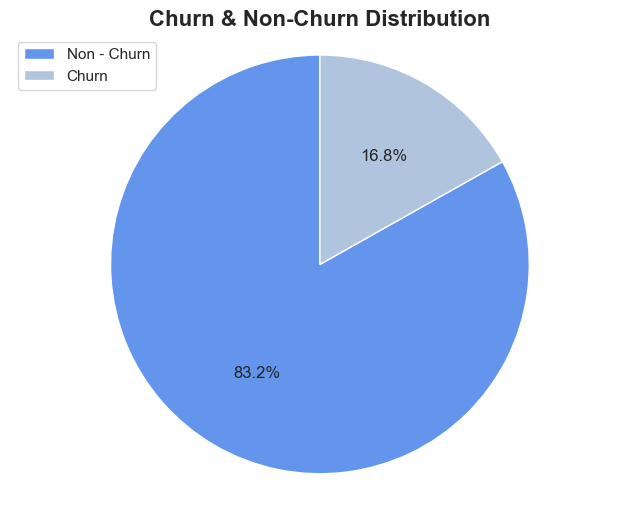

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_3_final' is your DataFrame with the 'Churn' column
percentages = (df_3_final['Churn'].value_counts() / df_3_final['Churn'].count()) * 100

# Labels for the legend
labels = ['Non - Churn', 'Churn']

# Create a pie chart with labels and a legend
plt.figure(figsize=(8, 6))
plt.pie(percentages, autopct='%1.1f%%', colors=["cornflowerblue", "lightsteelblue"], startangle=90)
plt.title('Churn & Non-Churn Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels, loc="best")
plt.show()

According to this chart, only 16.8% of customers have churned out of all data, while 83.2% of customers are non-churning. It is clear that the majority of customers are not churned.

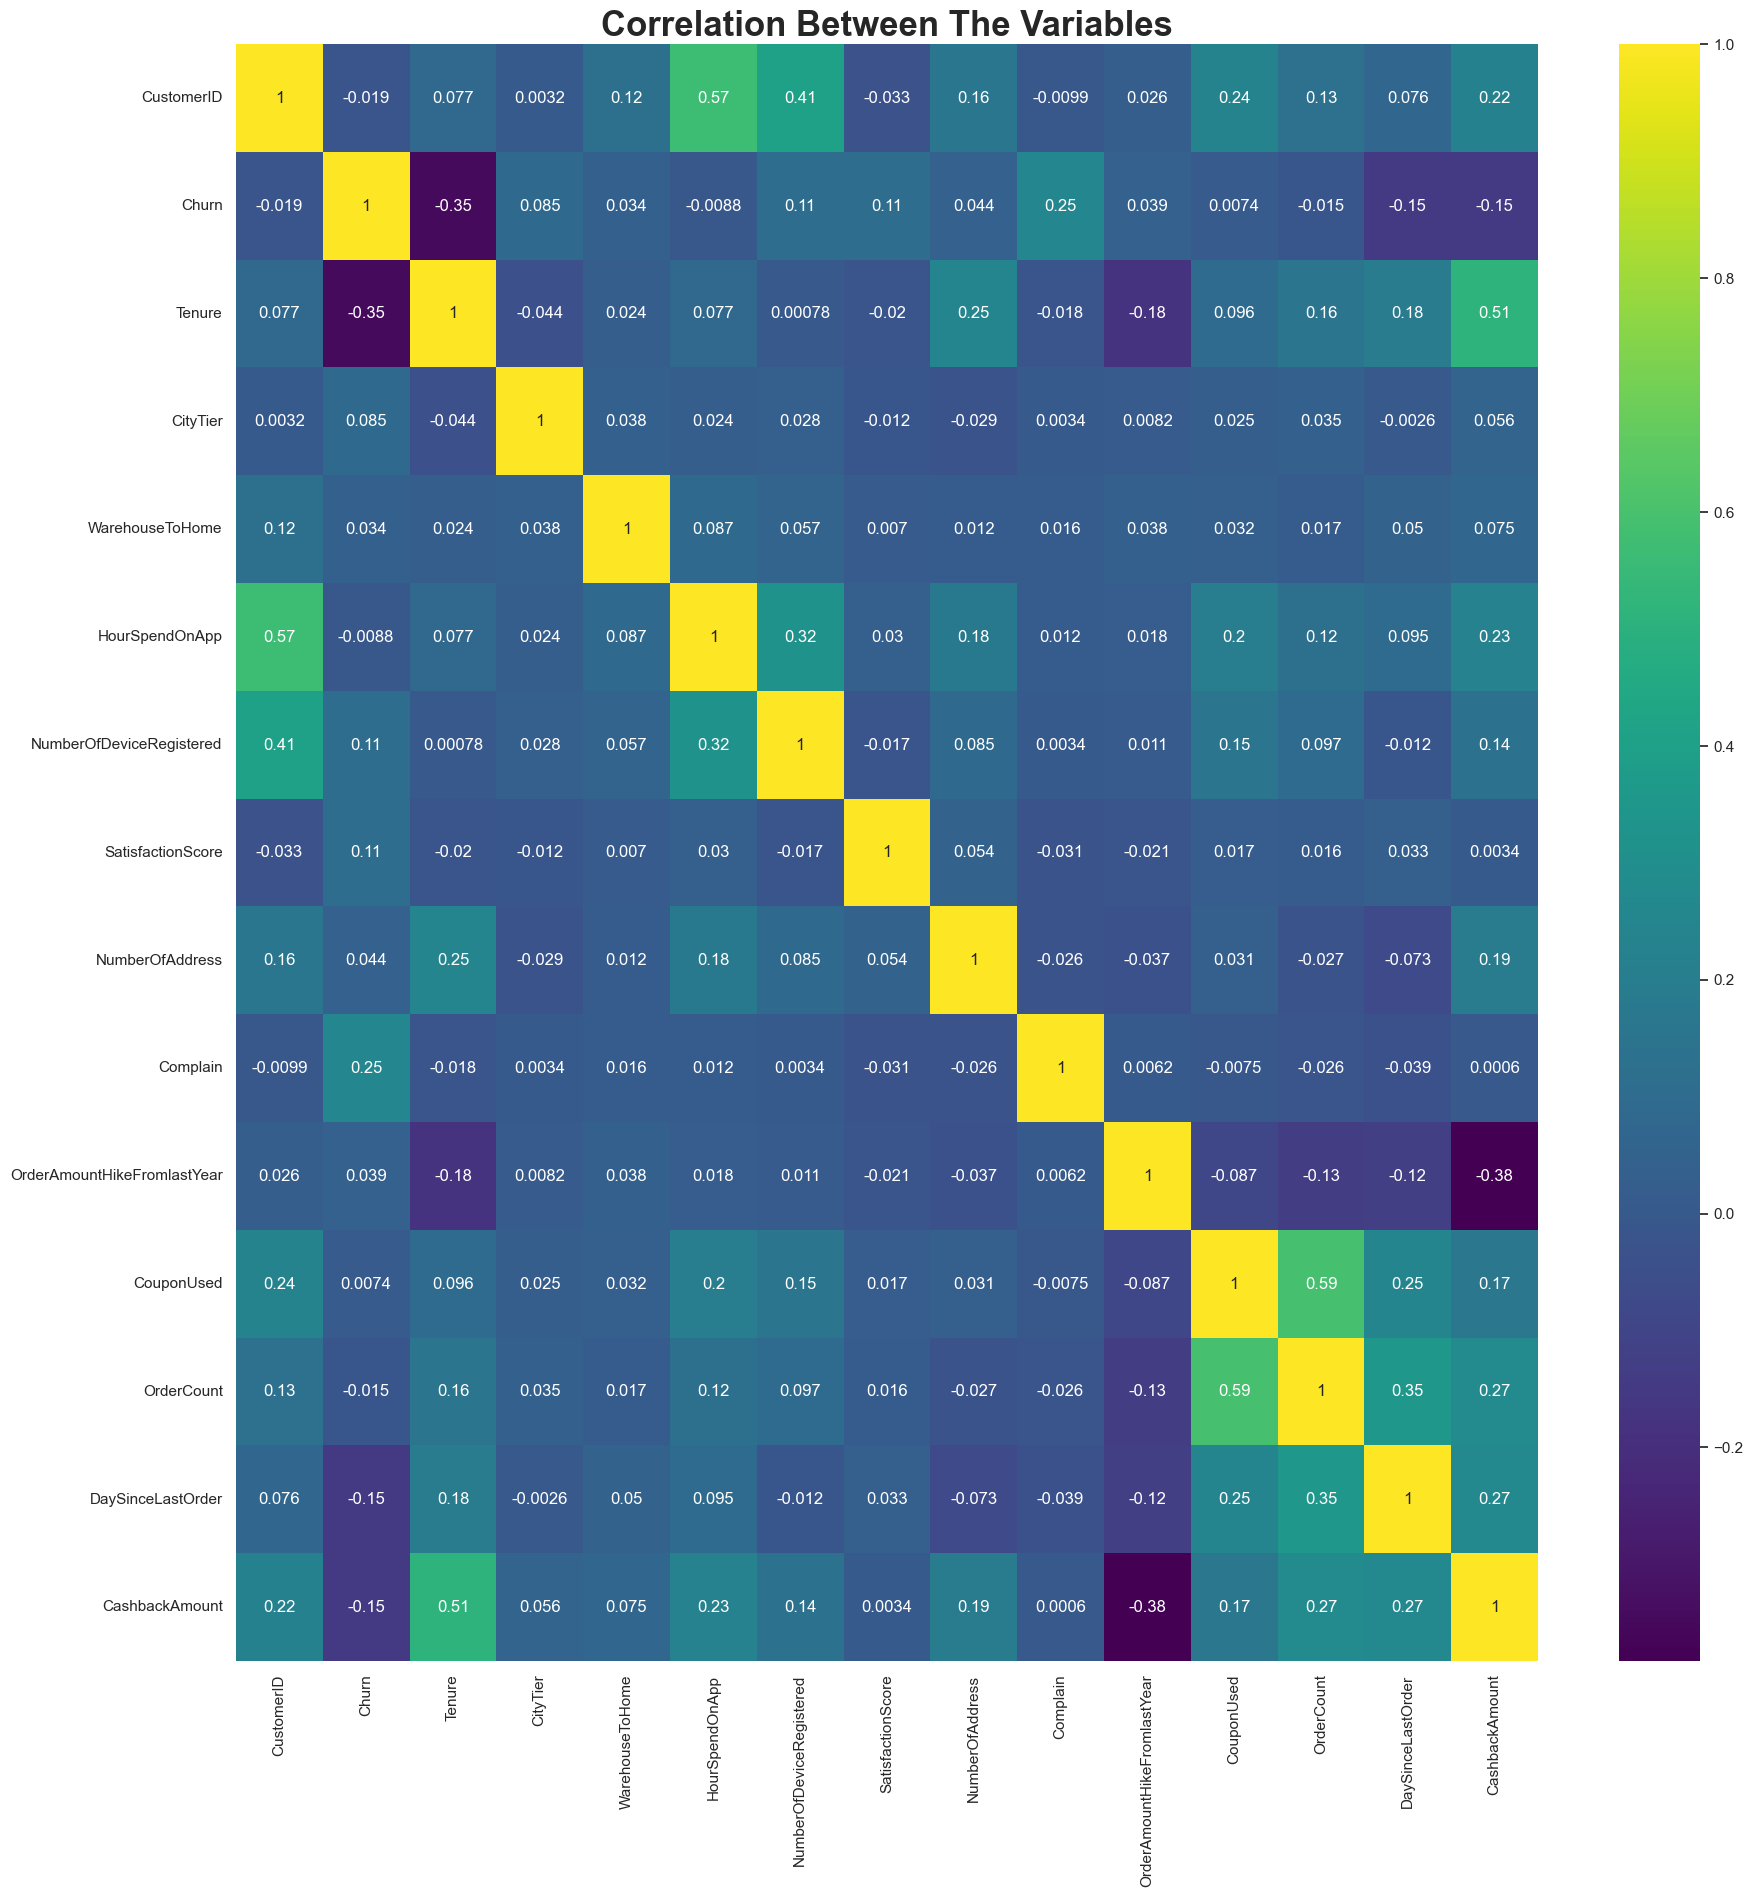

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_3_final.corr()

# Set up the subplots
fig, ax = plt.subplots(figsize=(21, 21))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", ax=ax)

# Add subplot titles
ax.set_title("Correlation Between The Variables", fontsize=25, fontweight='bold')
plt.show()

The correlation between each feature in the dataset is depicted by this heat map plot. It is clear that there is a strong negative correlation between churn and tenure. It is -0.35. The Churn and Complain features have the strongest positive correlation. According to the chart, there is a significant negative correlation between the features Tenure and OrderAmountHikeFromLastYear. Aside from that, this chart shows that the DaySinceLastOrder and CashbackAmount features also have a strong negative correlation with Churn by comparing with the other features. It is -0.15.

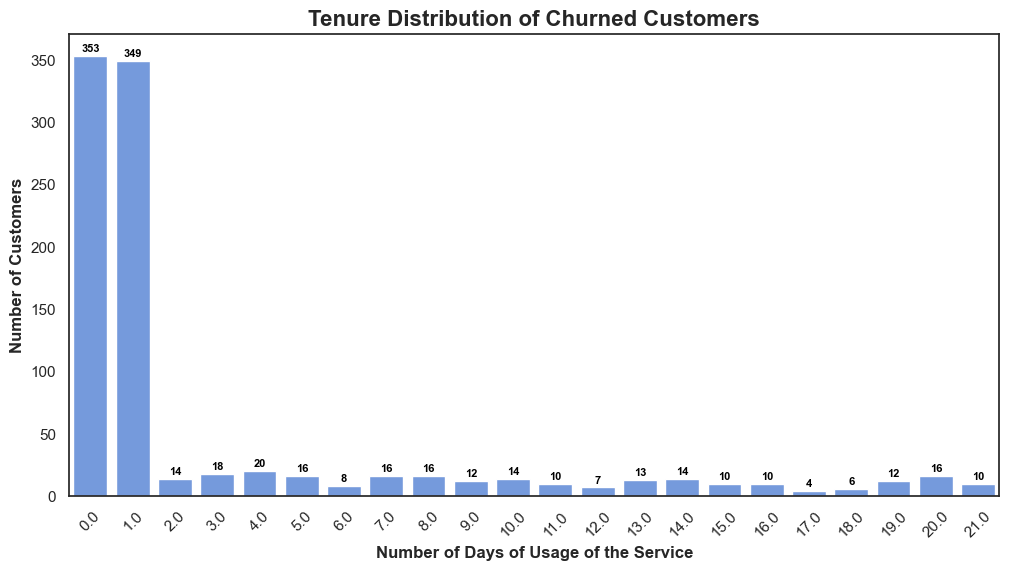

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.set(style="white")  # Set the style of the plot

# Assuming you want to plot a count of each category in a column called 'Category'
ax = sns.countplot(data=df_3_final_yes, x='Tenure', color="cornflowerblue")

plt.title('Tenure Distribution of Churned Customers', fontsize=16, fontweight='bold')
plt.xlabel('Number of Days of Usage of the Service', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed

# Add counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()

According to this graph, the majority of churned customers have a short tenure. The average length of time a churned customer used the service is 0 or 1. As a result, it is clear that when the Tenure is low, there is a high level of customer churn. Because there are only a few churned customers with long tenure.  

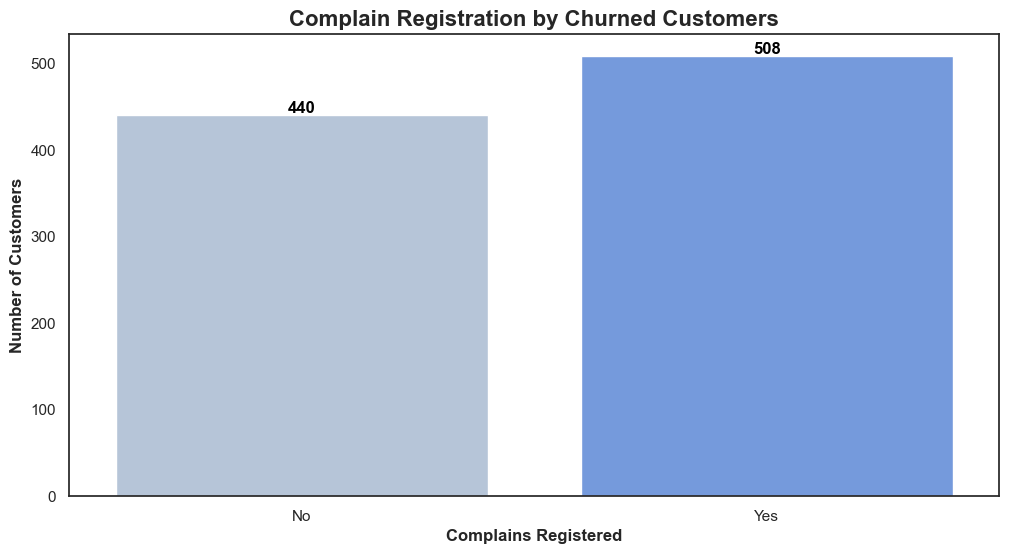

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.set(style="white")  # Set the style of the plot

labels = ['No', 'Yes']

# Assuming you want to plot a count of each category in a column called 'Tenure'
colors = ['lightsteelblue', 'cornflowerblue']
ax = sns.countplot(data=df_3_final_yes, x='Complain', palette=colors)

plt.title('Complain Registration by Churned Customers', fontsize=16, fontweight='bold')
plt.xlabel('Complains Registered', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

plt.xticks(ticks=[0, 1], labels=labels)  # Set custom x-axis labels

# Add counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold', color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

This chart shows that there are a lot of complaints among churned customers, with 508. As a result, it clearly shows that high customer complaints have an impact on customer churn.

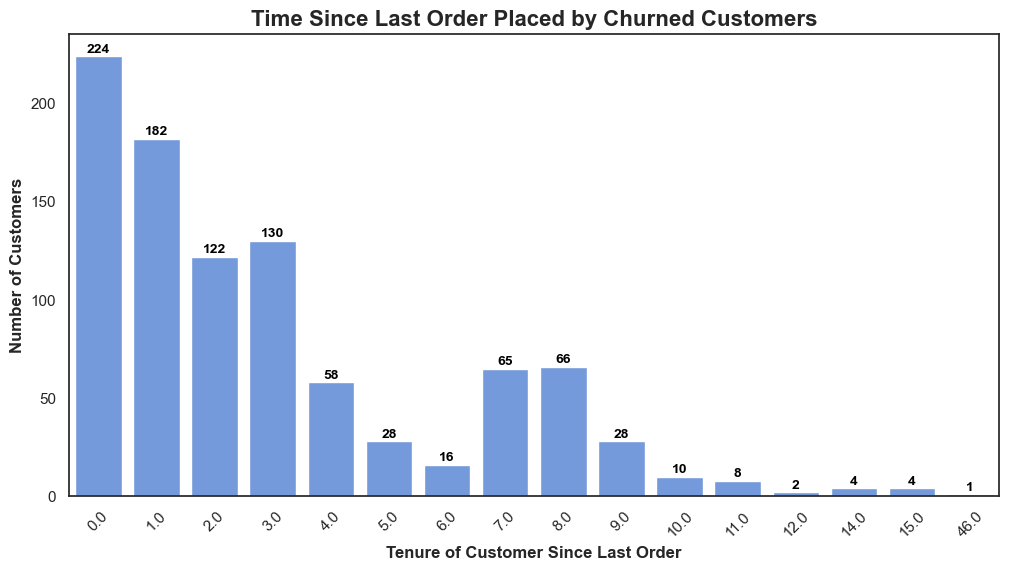

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.set(style="white")  # Set the style of the plot

# Assuming you want to plot a count of each category in a column called 'Category'
ax = sns.countplot(data=df_3_final_yes, x='DaySinceLastOrder', color="cornflowerblue")

plt.title('Time Since Last Order Placed by Churned Customers', fontsize=16, fontweight='bold')
plt.xlabel('Tenure of Customer Since Last Order', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed

# Add counts to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()

According to this graph, the majority of churned customers are in the 0 day category. Furthermore, the chart is skewed to the right. As a result, it clearly shows that when the day since last order value is low, the number of churned customers is high. With 46 days, the chart shows only one churned customer.

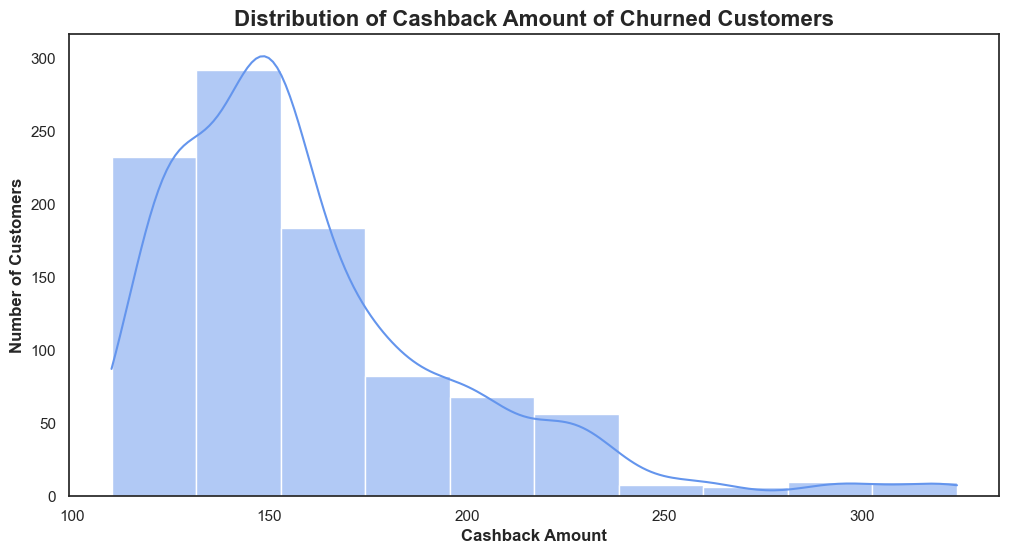

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with a KDE curve
plt.figure(figsize=(12, 6))
sns.set(style="white")

sns.histplot(data=df_3_final_yes, x='CashbackAmount', color="cornflowerblue", bins=10, kde=True)

plt.title('Distribution of Cashback Amount of Churned Customers', fontsize=16, fontweight='bold')
plt.xlabel('Cashback Amount', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')

plt.show()

We created a histogram chart because there are so many different Cashback Values among customers. This chart is skewed to the right as well. As a result, it is clear that when the Cashback Amount is low, customer churn increases. When the Cashback Amount is high, the number of churned customers decreases.

The last four charts clearly show a strong relationship between the churn feature. Following that, we applied label encoding to all non-numeric values in order to convert all categorical data into numerical data. It aids in the development of models for data training. As a result, we converted the data in five non-numerical features into numeric characters.

In [35]:
# Converting categorical variables into numerics

# PreferredLoginDevice
df_3_cat['PreferredLoginDevice'] = df_3_cat['PreferredLoginDevice'].map({'Phone':1, 'Computer':2})
# Gender
df_3_cat['Gender'] = df_3_cat['Gender'].map({'Female':1,'Male':2})
# MaritalStatus
df_3_cat['MaritalStatus'] = df_3_cat['MaritalStatus'].map({'Single':1,'Divorced':2, 'Married':3})
# PreferredPaymentMode
df_3_cat['PreferredPaymentMode'] = df_3_cat['PreferredPaymentMode'].map({'Debit Card':1,'UPI':2, 'Cash on Delivery':3, 'E wallet':4, 'Credit Card':5})
# PreferedOrderCat
df_3_cat['PreferedOrderCat'] = df_3_cat['PreferedOrderCat'].map({'Laptop & Accessory':1,'Mobile':2,'Others':3,'Fashion':4,'Grocery':5})

In [36]:
df_3_final_encoded = pd.concat([df_3_num, df_3_cat], axis = 1)
df_3_final_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160,1,1,1,1,1
1,50002,1,0.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,1,2,2,2,1
2,50003,1,0.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120,1,1,2,2,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134,1,1,2,1,1
4,50005,1,0.0,1,12.0,0.0,3,5,3,0,11.0,1.0,1.0,3.0,130,1,5,2,2,1


Lazy Predict assists in the construction of many basic models with little code and in determining which models work best without any parameter tuning. We considered two characteristics when deciding which model to use to train our data. They are the model's accuracy and the time required to train all of the data. Considering those data, it is clear that the DecisionTreeClassifier model has a high accuracy and that the time required to train the data is very short. As a result, we used DecisionTreeClassifier as the primary method to construct the model.

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = df_3_final_encoded.drop(columns=['Churn'])
y = df_3_final_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=140)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:16<00:00,  1.71it/s]

[LightGBM] [Info] Number of positive: 766, number of negative: 3738
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170071 -> initscore=-1.585124
[LightGBM] [Info] Start training from score -1.585124


100%|██████████| 29/29 [00:17<00:00,  1.67it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.97               0.94     0.94      0.97   
LabelSpreading                     0.97               0.94     0.94      0.97   
XGBClassifier                      0.97               0.92     0.92      0.96   
ExtraTreesClassifier               0.97               0.92     0.92      0.97   
DecisionTreeClassifier             0.95               0.91     0.91      0.95   
LGBMClassifier                     0.96               0.90     0.90      0.96   
RandomForestClassifier             0.96               0.90     0.90      0.96   
ExtraTreeClassifier                0.92               0.87     0.87      0.92   
BaggingClassifier                  0.95               0.86     0.86      0.95   
QuadraticDiscriminantAnalysis      0.87               0.78     0.78      0.87   
GaussianNB                  

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df_3_final_encoded.drop(columns=['Churn'])
y = df_3_final_encoded['Churn']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Create a Decision Tree Classifier
rf_3 = DecisionTreeClassifier()

rf_3.fit(X_train, y_train)

y_pred_decision_tree = rf_3.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")

Decision Tree Accuracy: 0.9520


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

LogisticRegression_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {LogisticRegression_accuracy:.4f}")

Logistic Regression Accuracy: 0.8881


Utilizing the DecisionTreeClassifier model, we have effectively visualized the feature importance, revealing that Tenure, Complain, DaySinceLastOrder, and CashbackAmount wield the most significant influence on the Churn prediction. This insight serves as a vital strategic tool in our quest to mitigate customer churn. Specifically, it underscores the critical factors demanding our attention. Customers with shorter tenures, a high history of complaints, a low interval since their last order, and minimal cashback rewards emerge as the segments most susceptible to churning. Armed with this knowledge, we can now tailor retention strategies, allocate resources, and implement targeted measures to retain these at-risk customers and enhance overall customer satisfaction and loyalty.

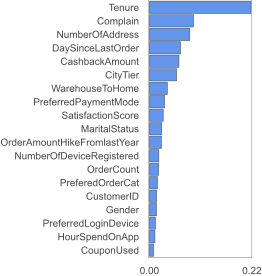

In [41]:
!pip install rfpimp

from rfpimp import importances, plot_importances

I = importances(rf_3, X_train, y_train)
plot_importances(I, color='cornflowerblue')